In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
def create_df(data_string):
    # Split the string into lines
    lines = data_string.strip().split('\n')

    # Convert each line to a list and store in a 2D array
    array_2d = [line.split('\t') for line in lines]

    for i in range(len(array_2d)):
        array_2d[i] = [float(x) if x else None for x in array_2d[i]]

    # Convert the data to a DataFrame
    df = pd.DataFrame(array_2d)
    # Assuming the missing values are meant to be zeros
    df = df.fillna(0)

    df.index = range(1, len(df) + 1) 
    df.columns = range(1, len(df.columns) + 1)

    return df

In [37]:
def plot_heatmap(df, which_circuit, target): 
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, annot=True, cmap='coolwarm', vmin=0, vmax=0.25)
    plt.title(f'P(ancilla)=1 of type A plaquette {which_circuit} on {target}')
    plt.xlabel('Ancilla Qubits')
    plt.ylabel('N (number of repetitions)')
    plt.savefig(f'a{which_circuit}_{target}.png')
    plt.show()

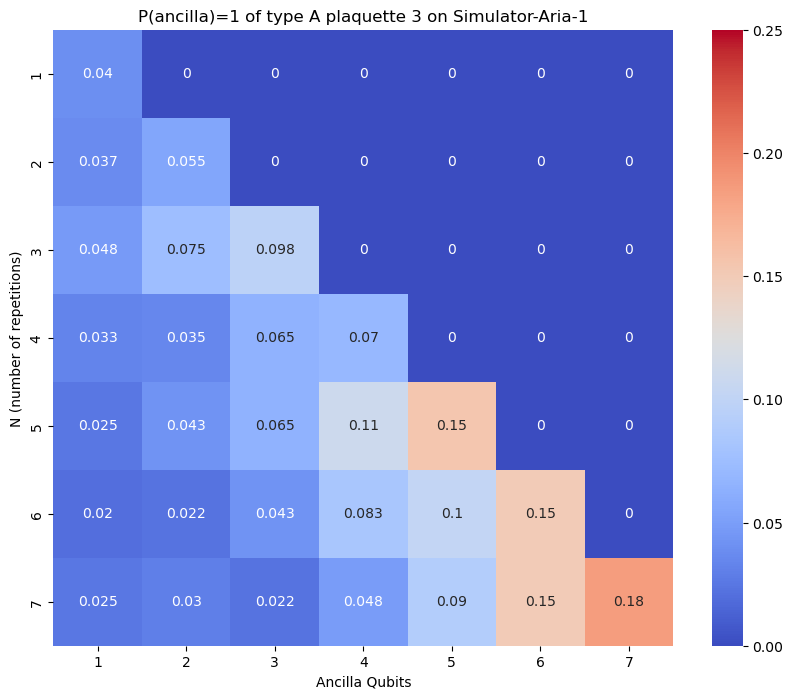

In [40]:
data_string = """
0.04						
0.0375	0.055					
0.0475	0.075	0.0975				
0.0325	0.035	0.065	0.070			
0.025	0.0425	0.065	0.110	0.155		
0.02	0.0225	0.0425	0.083	0.1025	0.15	
0.025	0.03	0.0225	0.048	0.09	0.15	0.185
"""

df = create_df(data_string)
plot_heatmap(df, '3', "Simulator-Aria-1")